In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Default plotting settings for matplotlib
plt.rc('figure', figsize=(10, 8), dpi=80)

# Datasets

In [3]:
data_dir = f'data'

## `multimodal_sparse`

In [4]:
multimodal_train = pd.read_csv(f'{data_dir}/regression/multimodal-sparse-training.csv')
multimodal_test = pd.read_csv(f'{data_dir}/regression/multimodal-sparse-test.csv')

In [5]:
print(multimodal_train.shape)
print(multimodal_test.shape)

(40, 2)
(200, 2)


In [6]:
multimodal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       40 non-null     float64
 1   y       40 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes


In [7]:
multimodal_train.describe()

,x,y
count,40.000000,40.000000
mean,0.354966,22.800451
std,1.002244,76.241021
min,-1.429514,-98.423908
25%,-0.329317,-59.923112
50%,0.305121,45.794695
75%,0.969123,97.199192
max,1.992345,100.299997


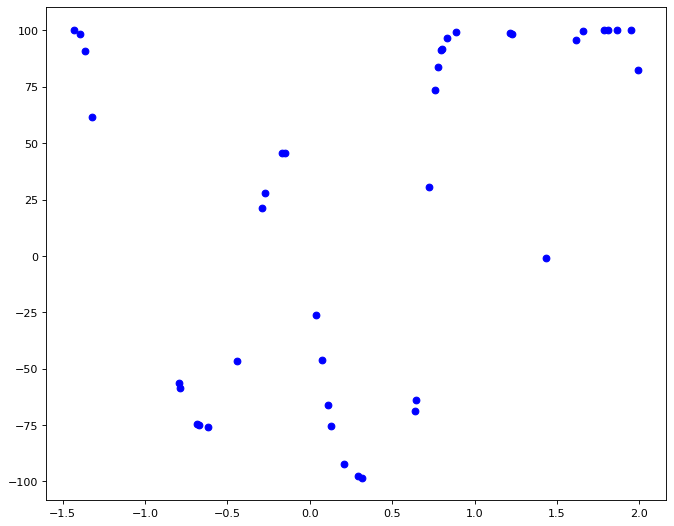

In [8]:
plt.scatter(multimodal_train['x'], multimodal_train['y'], color='blue')
plt.show()

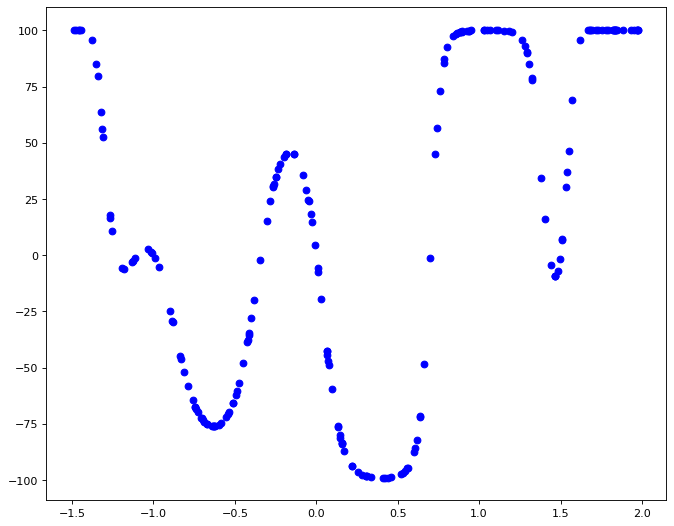

In [9]:
plt.scatter(multimodal_test['x'], multimodal_test['y'], color='blue')
plt.show()

Convert data to column arrays to prevent errors when predicting:

In [13]:
x_multimodal_train = multimodal_train['x'].to_numpy().reshape((-1, 1))
y_multimodal_train = multimodal_train['y'].to_numpy().reshape((-1, 1))
x_multimodal_test = multimodal_test['x'].to_numpy().reshape((-1, 1))
y_multimodal_test = multimodal_test['y'].to_numpy().reshape((-1, 1))

## `rings5_sparse`

In [10]:
rings5_train = pd.read_csv(f'{data_dir}/classification/rings5-sparse-training.csv')
rings5_test = pd.read_csv(f'{data_dir}/classification/rings5-sparse-test.csv')

In [11]:
print(rings5_train.shape)
print(rings5_test.shape)

(200, 3)
(2000, 3)


In [12]:
rings5_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   c       200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [13]:
rings5_train.describe()

,x,y,c
count,200.000000,200.000000,200.000000
mean,-7.664263,5.881538,2.000000
std,57.413914,58.418328,1.417762
min,-99.913681,-99.763396,0.000000
25%,-59.789687,-41.804461,1.000000
50%,2.218671,-3.872224,2.000000
75%,36.802553,62.146414,3.000000
max,99.633319,99.502415,4.000000


In [14]:
rings5_train['c'].value_counts()

0    40
1    40
2    40
3    40
4    40
Name: c, dtype: int64

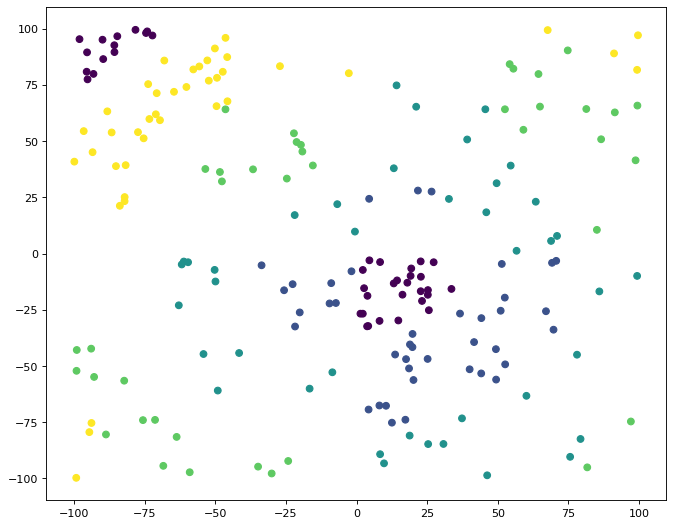

In [15]:
plt.scatter(rings5_train['x'], rings5_train['y'], c=rings5_train['c'])
plt.show()

One-hot encode the target variable:

In [16]:
rings5_train['c0'] = rings5_train['c'].map(lambda x: 1 if x == 0 else 0)
rings5_train['c1'] = rings5_train['c'].map(lambda x: 1 if x == 1 else 0)
rings5_train['c2'] = rings5_train['c'].map(lambda x: 1 if x == 2 else 0)
rings5_train['c3'] = rings5_train['c'].map(lambda x: 1 if x == 3 else 0)
rings5_train['c4'] = rings5_train['c'].map(lambda x: 1 if x == 4 else 0)

rings5_test['c0'] = rings5_test['c'].map(lambda x: 1 if x == 0 else 0)
rings5_test['c1'] = rings5_test['c'].map(lambda x: 1 if x == 1 else 0)
rings5_test['c2'] = rings5_test['c'].map(lambda x: 1 if x == 2 else 0)
rings5_test['c3'] = rings5_test['c'].map(lambda x: 1 if x == 3 else 0)
rings5_test['c4'] = rings5_test['c'].map(lambda x: 1 if x == 4 else 0)

Convert data to column arrays to prevent errors when predicting:

In [17]:
x_rings5_train = rings5_train[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_rings5_train = rings5_train['c'].to_numpy().reshape((-1, 1))
yonehot_rings5_train = rings5_train[['c0', 'c1', 'c2', 'c3', 'c4']].to_numpy().reshape((-1, 5))

x_rings5_test = rings5_test[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_rings5_test = rings5_test['c'].to_numpy().reshape((-1, 1))
yonehot_rings5_test = rings5_test[['c0', 'c1', 'c2', 'c3', 'c4']].to_numpy().reshape((-1, 5))

## `rings3_balance`

In [18]:
rings3_train = pd.read_csv(f'{data_dir}/classification/rings3-balance-training.csv')
rings3_test = pd.read_csv(f'{data_dir}/classification/rings3-balance-test.csv')

In [19]:
print(rings3_train.shape)
print(rings3_test.shape)

(2060, 3)
(2000, 3)


In [20]:
rings3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2060 non-null   float64
 1   y       2060 non-null   float64
 2   c       2060 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 48.4 KB


In [21]:
rings3_train.describe()

,x,y,c
count,2060.000000,2060.000000,2060.000000
mean,-1.201294,-0.821851,0.543689
std,54.841675,56.325719,0.553618
min,-99.971669,-99.936726,0.000000
25%,-45.790630,-43.733194,0.000000
50%,9.920344,-2.759414,1.000000
75%,39.788163,42.603811,1.000000
max,99.324027,99.975299,2.000000


In [22]:
rings3_train['c'].value_counts()

0    1000
1    1000
2      60
Name: c, dtype: int64

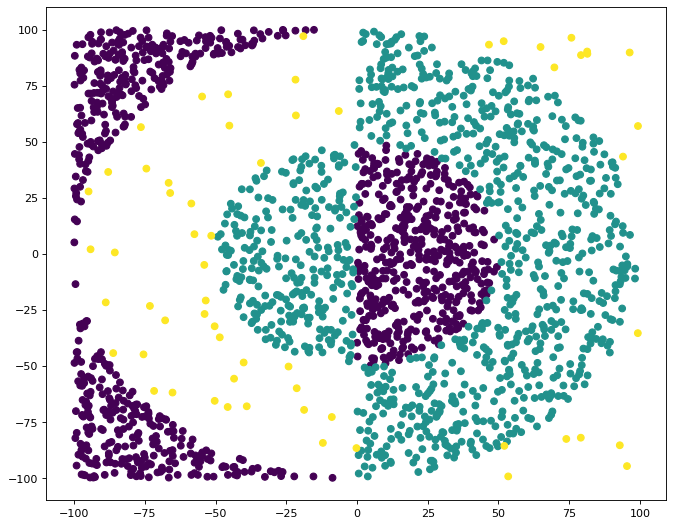

In [23]:
plt.scatter(rings3_train['x'], rings3_train['y'], c=rings3_train['c'])
plt.show()

One-hot encode the target variable:

In [24]:
rings3_train['c0'] = rings3_train['c'].map(lambda x: 1 if x == 0 else 0)
rings3_train['c1'] = rings3_train['c'].map(lambda x: 1 if x == 1 else 0)
rings3_train['c2'] = rings3_train['c'].map(lambda x: 1 if x == 2 else 0)

rings3_test['c0'] = rings3_test['c'].map(lambda x: 1 if x == 0 else 0)
rings3_test['c1'] = rings3_test['c'].map(lambda x: 1 if x == 1 else 0)
rings3_test['c2'] = rings3_test['c'].map(lambda x: 1 if x == 2 else 0)

Convert data to column arrays to prevent errors when predicting:

In [25]:
x_rings3_train = rings3_train[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_rings3_train = rings3_train['c'].to_numpy().reshape((-1, 1))
yonehot_rings3_train = rings3_train[['c0', 'c1', 'c2']].to_numpy().reshape((-1, 3))

x_rings3_test = rings3_test[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_rings3_test = rings3_test['c'].to_numpy().reshape((-1, 1))
yonehot_rings3_test = rings3_test[['c0', 'c1', 'c2']].to_numpy().reshape((-1, 3))

## `xor3_balance`

In [26]:
xor3_train = pd.read_csv('data/classification/xor3-balance-training.csv')
xor3_test = pd.read_csv('data/classification/xor3-balance-test.csv')

In [27]:
print(xor3_train.shape)
print(xor3_test.shape)

(1050, 3)
(800, 3)


In [28]:
xor3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1050 non-null   float64
 1   y       1050 non-null   float64
 2   c       1050 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 24.7 KB


In [29]:
xor3_train.describe()

,x,y,c
count,1050.000000,1050.000000,1050.000000
mean,-3.217390,0.678283,0.047619
std,62.192029,62.398552,0.213060
min,-99.972599,-99.963537,0.000000
25%,-59.511564,-57.170380,0.000000
50%,-6.533831,-3.372806,0.000000
75%,57.027522,58.930197,0.000000
max,99.962408,99.977953,1.000000


In [30]:
xor3_train['c'].value_counts()

0    1000
1      50
Name: c, dtype: int64

In [31]:
def plot_approx_lines_xor3():
    plt.plot([[-100, -100, -33.33, 33.33], [100, 100, -33.33, 33.33]], [[-33.33, 33.33, -100, -100], [-33.33, 33.33, 100, 100]], 'r')

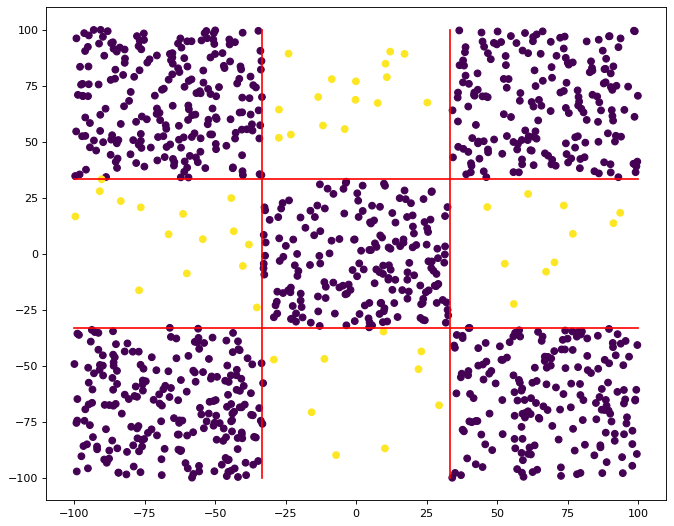

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(xor3_train['x'], xor3_train['y'], c=xor3_train['c'])
plot_approx_lines_xor3()
plt.show()

One-hot encode the target variable:

In [33]:
xor3_train['c0'] = xor3_train['c'].map(lambda x: 1 if x == 0 else 0)
xor3_train['c1'] = xor3_train['c'].map(lambda x: 1 if x == 1 else 0)

xor3_test['c0'] = xor3_test['c'].map(lambda x: 1 if x == 0 else 0)
xor3_test['c1'] = xor3_test['c'].map(lambda x: 1 if x == 1 else 0)

Convert data to column arrays to prevent errors when predicting:

In [34]:
x_xor3_train = xor3_train[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_xor3_train = xor3_train['c'].to_numpy().reshape((-1, 1))
yonehot_xor3_train = xor3_train[['c0', 'c1']].to_numpy().reshape((-1, 2))

x_xor3_test = xor3_test[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_xor3_test = xor3_test['c'].to_numpy().reshape((-1, 1))
yonehot_xor3_test = xor3_test[['c0', 'c1']].to_numpy().reshape((-1, 2))

# Models training

In [37]:
from mlp import MLP
from mlp.activations import (
    SigmoidActivation, TanhActivation, ReLUActivation,
    LinearActivation, SoftmaxActivation,
)
from mlp.lossfunc_and_metrics import MSE, CrossEntropy, fmeasure_prob
from mlp.optimisers import MomentumGD, RMSProp

## `multimodal_sparse`

In [44]:
mlp_multi = MLP(1, [20], 1, 
                activation_func=SigmoidActivation(),
                out_func=LinearActivation(),
                loss=MSE())

Epoch 50/20000 done | eval_metric(train) = 2884.35 | eval_metric(test) = 2824.64
Epoch 100/20000 done | eval_metric(train) = 2749.28 | eval_metric(test) = 2676.95
Epoch 150/20000 done | eval_metric(train) = 2651.84 | eval_metric(test) = 2591.18
Epoch 200/20000 done | eval_metric(train) = 2809.15 | eval_metric(test) = 2755.96
Epoch 250/20000 done | eval_metric(train) = 2577.82 | eval_metric(test) = 2530.98
Epoch 300/20000 done | eval_metric(train) = 2535.01 | eval_metric(test) = 2494.97
Epoch 350/20000 done | eval_metric(train) = 2644.53 | eval_metric(test) = 2627.08
Epoch 400/20000 done | eval_metric(train) = 2367.21 | eval_metric(test) = 2336.47
Epoch 450/20000 done | eval_metric(train) = 2448.67 | eval_metric(test) = 2410.03
Epoch 500/20000 done | eval_metric(train) = 1862.29 | eval_metric(test) = 1845.76
Epoch 550/20000 done | eval_metric(train) = 1724.70 | eval_metric(test) = 1736.54
Epoch 600/20000 done | eval_metric(train) = 1128.08 | eval_metric(test) = 1133.80
Epoch 650/20000 d

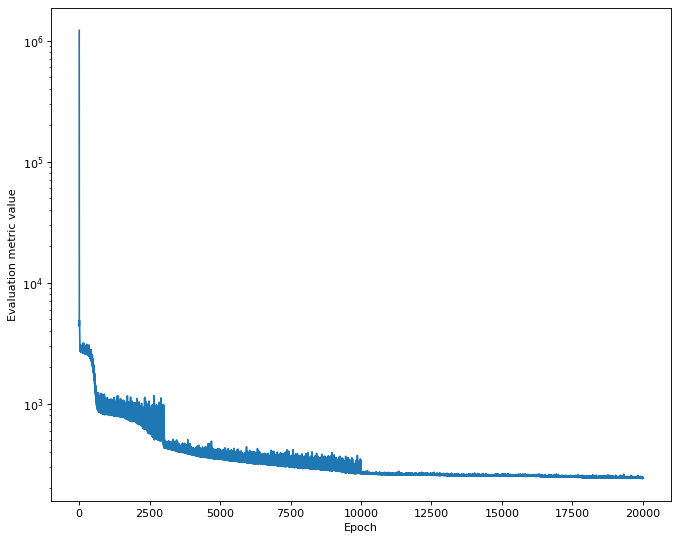

In [46]:
mlp_multi.train(
    x_multimodal_train, y_multimodal_train,
    optimiser=RMSProp(),
    x_test=x_multimodal_test, y_test=y_multimodal_test,
    epochs=10000, learning_rate=0.1, batch_size=32,
    plot_metric=True, random_state=28, verbosity_period=50,
);

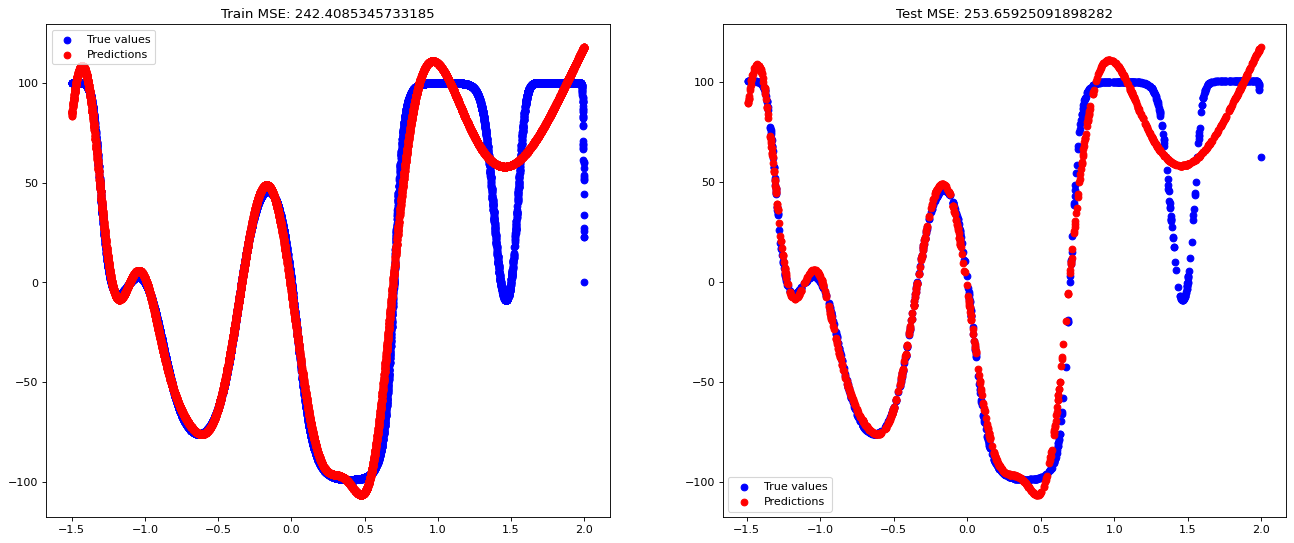

In [47]:
plt.figure(figsize=(20, 8))

pred_train = mlp_multi.predict(x_multimodal_train)
pred_test = mlp_multi.predict(x_multimodal_test)

plt.subplot(1, 2, 1)
plt.scatter(x_multimodal_train, y_multimodal_train, color='blue', label='True values')
plt.scatter(x_multimodal_train, pred_train, color='red', label='Predictions')
mse_train = mlp_multi.eval_metric(y_multimodal_train, pred_train)
plt.title(f'Train MSE: {mse_train}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_multimodal_test, y_multimodal_test, color='blue', label='True values')
plt.scatter(x_multimodal_test, pred_test, color='red', label='Predictions')
mse_test = mlp_multi.eval_metric(y_multimodal_test, pred_test)
plt.title(f'Test MSE: {mse_test}')
plt.legend()

plt.show()

## `rings5_sparse`

In [49]:
mlp_rings5 = MLP(2, [10, 10, 10], 5, 
                 activation_func=TanhActivation(),
                 out_func=SoftmaxActivation(),
                 loss=CrossEntropy(),
                 eval_metric=fmeasure_prob)

Epoch 100/600 done | eval_metric(train) = 0.65 | eval_metric(test) = 0.60
Epoch 200/600 done | eval_metric(train) = 0.80 | eval_metric(test) = 0.77
Epoch 300/600 done | eval_metric(train) = 0.85 | eval_metric(test) = 0.79
Epoch 400/600 done | eval_metric(train) = 0.87 | eval_metric(test) = 0.81
Epoch 500/600 done | eval_metric(train) = 0.81 | eval_metric(test) = 0.78
Epoch 600/600 done | eval_metric(train) = 0.86 | eval_metric(test) = 0.81
Min loss on epoch 544 (metric: 0.89)
Final train metric value: 0.86


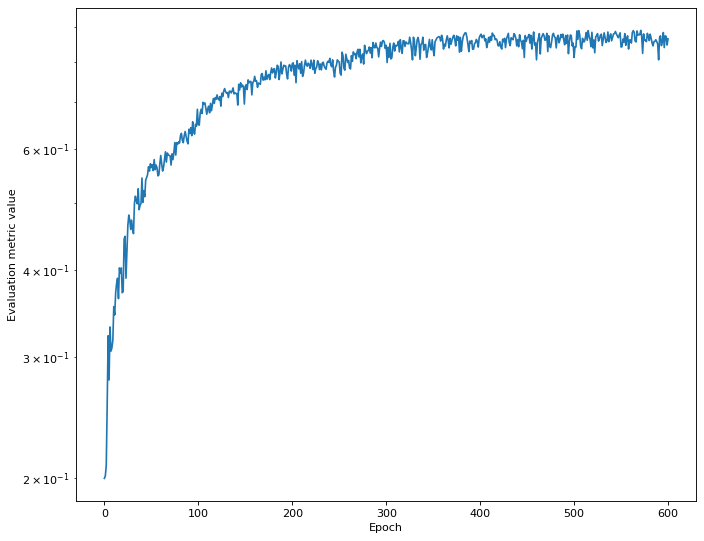

In [50]:
mlp_rings5.train(
    x_rings5_train, yonehot_rings5_train,
    optimiser=RMSProp(),
    x_test=x_rings5_test, y_test=yonehot_rings5_test,
    epochs=600, learning_rate=0.005, batch_size=16, 
    plot_metric=True, random_state=24, verbosity_period=100,
);

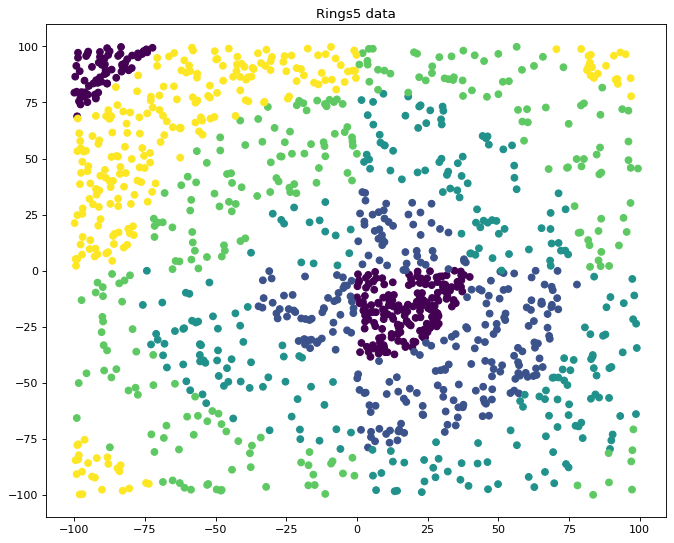

In [51]:
plt.figure(figsize=(10, 8))
plt.scatter(rings5_train['x'], rings5_train['y'], c=rings5_train['c'])
plt.title('Rings5 data')
plt.show()

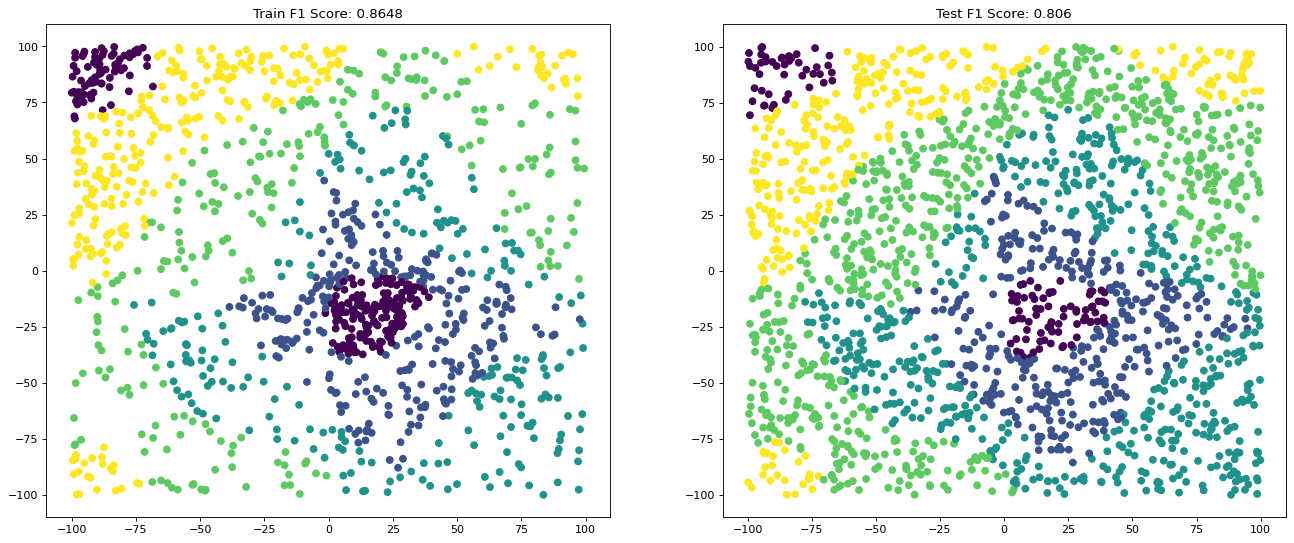

In [52]:
pred_prob_train = mlp_rings5.predict(x_rings5_train)
pred_labels_train = mlp_rings5.predict(x_rings5_train, convert_prob_to_labels=True)
pred_prob_test = mlp_rings5.predict(x_rings5_test)
pred_labels_test = mlp_rings5.predict(x_rings5_test, convert_prob_to_labels=True)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_rings5_train[:, 0], x_rings5_train[:, 1], c=pred_labels_train)
f1_train = mlp_rings5.eval_metric(yonehot_rings5_train, pred_prob_train)
plt.title(f'Train F1 Score: {f1_train}')

plt.subplot(1, 2, 2)
plt.scatter(x_rings5_test[:, 0], x_rings5_test[:, 1], c=pred_labels_test)
f1_test = mlp_rings5.eval_metric(yonehot_rings5_test, pred_prob_test)
plt.title(f'Test F1 Score: {f1_test}')

plt.show()

## `rings3_balance`

In [ ]:
mlp_rings3 = MLP(2, [20, 20], 3, 
                 activation_func=ReLUActivation(),
                 out_func=SoftmaxActivation(),
                 loss=CrossEntropy(),
                 eval_metric=fmeasure_prob)

Epoch 100/2600 done | eval_metric(train) = 0.47 | eval_metric(test) = 0.47
Epoch 200/2600 done | eval_metric(train) = 0.53 | eval_metric(test) = 0.58
Epoch 300/2600 done | eval_metric(train) = 0.55 | eval_metric(test) = 0.56
Epoch 400/2600 done | eval_metric(train) = 0.60 | eval_metric(test) = 0.64
Epoch 500/2600 done | eval_metric(train) = 0.56 | eval_metric(test) = 0.59
Epoch 600/2600 done | eval_metric(train) = 0.66 | eval_metric(test) = 0.66
Epoch 700/2600 done | eval_metric(train) = 0.72 | eval_metric(test) = 0.73
Epoch 800/2600 done | eval_metric(train) = 0.86 | eval_metric(test) = 0.86
Epoch 900/2600 done | eval_metric(train) = 0.88 | eval_metric(test) = 0.88
Epoch 1000/2600 done | eval_metric(train) = 0.90 | eval_metric(test) = 0.89
Epoch 1100/2600 done | eval_metric(train) = 0.90 | eval_metric(test) = 0.89
Epoch 1200/2600 done | eval_metric(train) = 0.91 | eval_metric(test) = 0.89
Epoch 1300/2600 done | eval_metric(train) = 0.90 | eval_metric(test) = 0.88
Epoch 1400/2600 done 

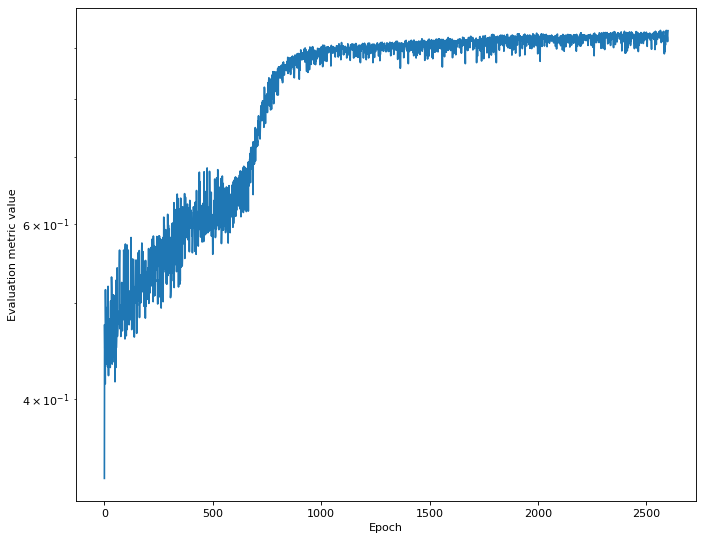

In [ ]:
mlp_rings3.train(
    x_rings3_train, yonehot_rings3_train,
    optimiser=RMSProp(),
    x_test=x_rings3_test, y_test=yonehot_rings3_test,
    epochs=2600, learning_rate=0.002, batch_size=16, 
    plot_metric=True, random_state=24, verbosity_period=100,
);

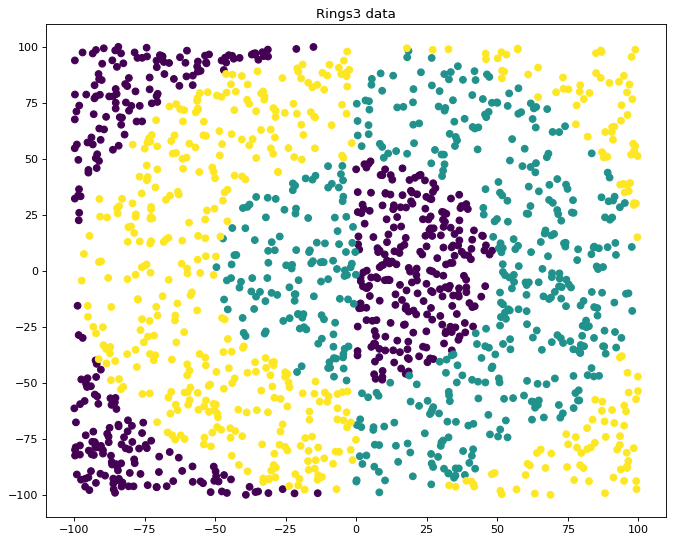

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(rings3_train['x'], rings3_train['y'], c=rings3_train['c'])
plt.title('Rings3 data')
plt.show()

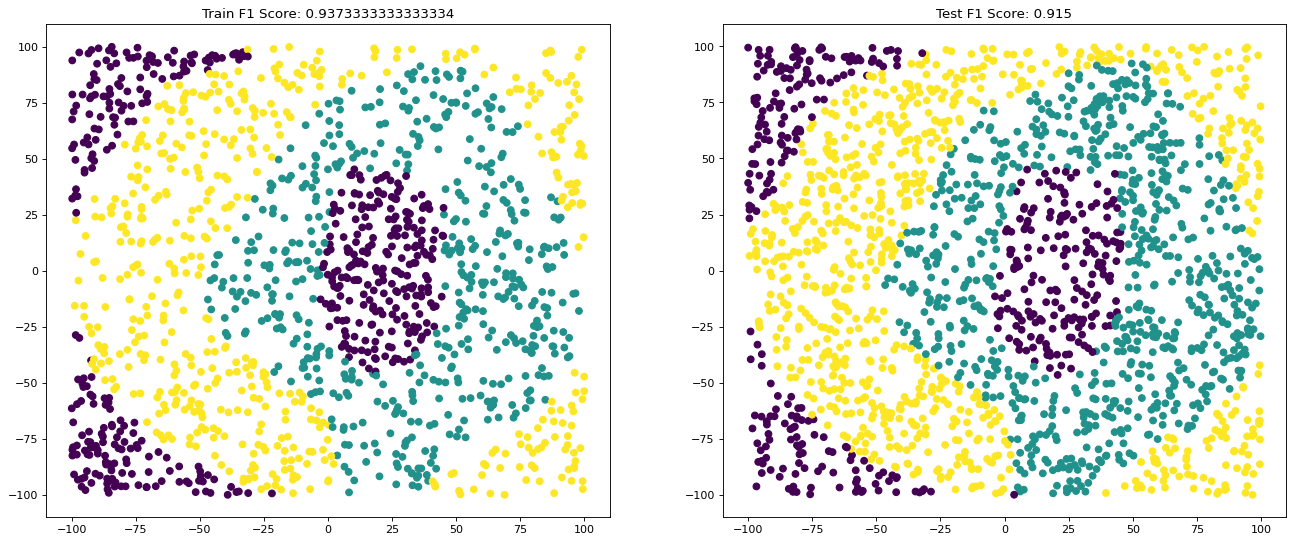

In [ ]:
pred_prob_train = mlp_rings3.predict(x_rings3_train)
pred_labels_train = mlp_rings3.predict(x_rings3_train, convert_prob_to_labels=True)
pred_prob_test = mlp_rings3.predict(x_rings3_test)
pred_labels_test = mlp_rings3.predict(x_rings3_test, convert_prob_to_labels=True)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_rings3_train[:, 0], x_rings3_train[:, 1], c=pred_labels_train)
f1_train = mlp_rings3.eval_metric(yonehot_rings3_train, pred_prob_train)
plt.title(f'Train F1 Score: {f1_train}')

plt.subplot(1, 2, 2)
plt.scatter(x_rings3_test[:, 0], x_rings3_test[:, 1], c=pred_labels_test)
f1_test = mlp_rings3.eval_metric(yonehot_rings3_test, pred_prob_test)
plt.title(f'Test F1 Score: {f1_test}')

plt.show()

## `xor3`

In [ ]:
mlp_xor3 = MLP(2, [5, 5], 2, 
               activation_func=SigmoidActivation(),
               out_func=SoftmaxActivation(),
               loss=CrossEntropy())

In [ ]:
def decaying_lr(epoch: int) -> float:
    if epoch < 7000:
        return 0.2
    else:
        return 0.05

Epoch 1000/200000 done | loss(train) = 346.31 | loss(test) = 345.89
Epoch 2000/200000 done | loss(train) = 340.68 | loss(test) = 337.60
Epoch 3000/200000 done | loss(train) = 273.17 | loss(test) = 271.69
Epoch 4000/200000 done | loss(train) = 76.99 | loss(test) = 100.59
Epoch 5000/200000 done | loss(train) = 50.58 | loss(test) = 70.18
Epoch 6000/200000 done | loss(train) = 34.46 | loss(test) = 47.12
Epoch 7000/200000 done | loss(train) = 36.92 | loss(test) = 65.00
Epoch 8000/200000 done | loss(train) = 21.18 | loss(test) = 39.69
Epoch 9000/200000 done | loss(train) = 19.94 | loss(test) = 37.71
Epoch 10000/200000 done | loss(train) = 19.05 | loss(test) = 38.42
Epoch 11000/200000 done | loss(train) = 19.20 | loss(test) = 42.75
Epoch 12000/200000 done | loss(train) = 17.77 | loss(test) = 40.87
Epoch 13000/200000 done | loss(train) = 16.89 | loss(test) = 35.26
Epoch 14000/200000 done | loss(train) = 16.06 | loss(test) = 39.54
Epoch 15000/200000 done | loss(train) = 15.91 | loss(test) = 35.

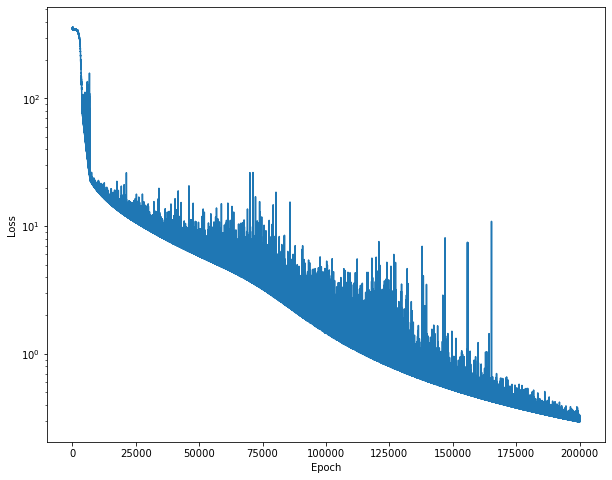

In [ ]:
mlp_xor3.train(
    x_xor3_train, yonehot_xor3_train,
    optimiser=RMSProp(),
    x_test=x_xor3_test, y_test=yonehot_xor3_test,
    epochs=200_000, learning_rate=decaying_lr, batch_size=32,
    plot_metric=True, random_state=28, verbosity_period=1000,
);

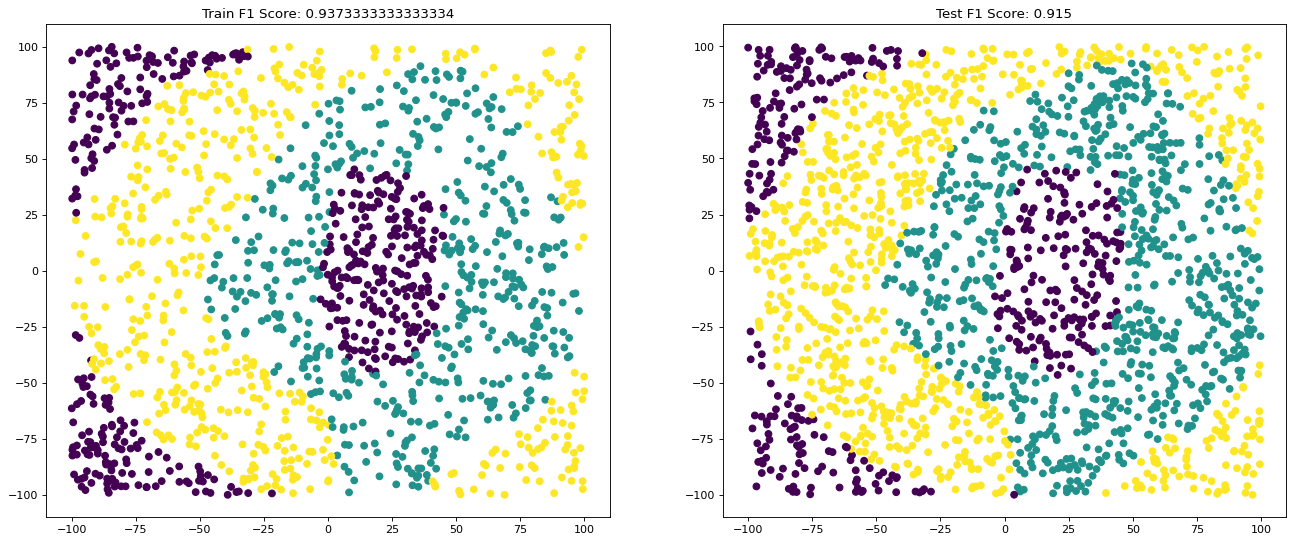

In [ ]:
pred_prob_train = mlp_xor3.predict(x_xor3_train)
pred_labels_train = mlp_xor3.predict(x_xor3_train, convert_prob_to_labels=True)
pred_prob_test = mlp_xor3.predict(x_xor3_test)
pred_labels_test = mlp_xor3.predict(x_xor3_test, convert_prob_to_labels=True)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_xor3_train[:, 0], x_xor3_train[:, 1], c=pred_labels_train)
f1_train = mlp_xor3.eval_metric(yonehot_xor3_train, pred_prob_train)
plt.title(f'Train F1 Score: {f1_train}')

plt.subplot(1, 2, 2)
plt.scatter(x_xor3_test[:, 0], x_xor3_test[:, 1], c=pred_labels_test)
f1_test = mlp_xor3.eval_metric(yonehot_xor3_test, pred_prob_test)
plt.title(f'Test F1 Score: {f1_test}')

plt.show()